In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt

pd.options.display.width = 180
pd.options.display.max_colwidth = 120

In [2]:
data_dir = 'D:\\full-stack\\nlp_miniproject\\chABSA-dataset'
# data_dir = '/content/drive/MyDrive/chABSA-dataset'
data_path = Path(data_dir)

In [3]:
path_list = [p for p in data_path.iterdir()]
print(len(path_list))
print(path_list[:5])

230
[WindowsPath('D:/full-stack/nlp_miniproject/chABSA-dataset/e00008_ann.json'), WindowsPath('D:/full-stack/nlp_miniproject/chABSA-dataset/e00017_ann.json'), WindowsPath('D:/full-stack/nlp_miniproject/chABSA-dataset/e00024_ann.json'), WindowsPath('D:/full-stack/nlp_miniproject/chABSA-dataset/e00026_ann.json'), WindowsPath('D:/full-stack/nlp_miniproject/chABSA-dataset/e00030_ann.json')]


In [4]:
with open(path_list[0], "br") as f:
    j =  json.load(f)
sentences = j["sentences"]

def create_rating(sentences):
    rating = []
    for obj in sentences:
        s = obj["sentence"]
        op = obj["opinions"]
        porarity = 0
        for o in op:
            p = o["polarity"]
            if p == "positive":
                porarity += 1
            elif p == "negative":
                porarity -= 1
        if porarity !=0 :
            rating.append((porarity, s))
    return rating


In [5]:
create_rating(sentences)

[(4,
  '当連結会計年度におけるわが国経済は、政府の経済政策や日銀の金融緩和策により、企業業績、雇用・所得環境は改善し、景気も緩やかな回復基調のうちに推移いたしましたが、中国をはじめとするアジア新興国経済の減速懸念や、英国の欧州連合（ＥＵ）離脱決定、米国新政権への移行など、引き続き先行きは不透明な状況となっております'),
 (-5,
  '当社グループを取り巻く環境は、実質賃金が伸び悩むなか、消費者の皆様の生活防衛意識の高まりや節約志向により、個人消費は本格的な改善には至らず、また少子高齢化、人口減少による社会構造の変化、雇用改善に伴う労働コストの上昇、企業間競争の激化など、引き続き厳しい状況となりました'),
 (2,
  '以上の結果、当連結会計年度の当社グループの業績は、売上高631億19百万円（前期比3.5％増）、営業利益34億30百万円（前期比0.1％増）、経常利益43億79百万円（前期比7.5％増）、親会社株主に帰属する当期純利益は28億28百万円（前期比8.9％増）となりました'),
 (1,
  'なお、当連結会計年度の生産量は、ブナピーを含めブナシメジ42,602ｔ（同5.5％増）、エリンギ19,250ｔ（同0.2％減）、マイタケ14,281ｔ（同4.3％増）となりました'),
 (1,
  '平成27年４月の火災により生産を休止していた苫小牧第一きのこセンターが、工場を再建し、平成28年４月27日よりブナシメジの収穫・出荷を再開したことや、カットブナシメジ専用工場として新設した富山きのこセンターが平成28年９月上旬から収穫・出荷を開始したことにより、ブナシメジの生産量は増加いたしました'),
 (1,
  'また、改修のため一時生産を休止しておりました広川きのこセンターにおきまして、平成28年９月上旬より霜降りひらたけの収穫・出荷を開始したことなどにより、きのこ全体の生産量は増加いたしました'),
 (-2, '春から夏にかけましては個人消費の低迷などにより、きのこの価格は厳しい状況で推移いたしました'),
 (2, '反面、秋から冬にかけましては天候不順などによる野菜価格の高騰により、きのこの価格は堅調に推移いたしました'),
 (1, '以上の結果、国内きのこ事業全体の売上高は422億96百万円（同3.1％増）となりました'),
 (

In [6]:
rating = []
for p in path_list:
    with open(p, "br") as f:
        j =  json.load(f)
    s = j["sentences"]
    rating += create_rating(s)
    
print(len(rating))

2813


In [7]:
neg = []
pos = []
for t in rating:
    if t[0] > 0:
        pos.append(t[1])
    else:
        neg.append(t[1])
        
(len(neg), len(pos))

(1143, 1670)

In [9]:
with open('D:\\full-stack\\nlp_miniproject\\neg.txt', 'w',errors="ignore") as f:
    for s in neg:
        r = s + '\n'
        f.write(r)

with open('D:\\full-stack\\nlp_miniproject\\pos.txt', 'w',errors="ignore") as f:
    for s in pos:
        r = s + '\n'
        f.write(r)

In [10]:

df1 = pd.DataFrame({'text': neg})
df1['target'] = 1
df2 = pd.DataFrame({'text': pos})
df2['target'] = 2

df = pd.concat([df1, df2], axis=0, ignore_index=True)
df = (df
        .sample(frac=1, ignore_index=True, random_state=42)
        .reset_index()
        .rename(columns={'index': 'Id'}))
df

,Id,text,target
0,0,建設用クレーン事業は、北米市場の低迷が長期化したことから、受注、売上ともに減少いたしました,1
1,1,この結果、売上高は前連結会計年度に比べて増加しました,2
2,2,セグメント利益は、電子部品向け金属粉の販売好調により、同186百万円増益（32.6％増益）の759百万円となりました,2
3,3,建設工事業の売上高は、石油関連施設の受注物件の工事完工が順調に進んだことから前期を上回った,2
4,4,このような状況の中、半導体製造装置向け製品の需要が高水準で推移した高機能製品部門と巻付け耐火被覆材をはじめとする非住宅部門の需要が堅調に推移した建材部門を中心に売上高が増加したため、当社グループの売上高は前連結会計年度に対し5.8％...,2
...,...,...,...
2808,2808,報告セグメントに含まれない不動産賃貸料の収入など、その他事業の当連結会計年度の売上高は 200百万円 (前年同期比 1.6％増)、営業利益は 51百万円 (前年同期比 26.1％増) となりました,2
2809,2809,"以上の結果、当連結会計年度における売上高は3,711百万円（前年同期比0.7%減）となりました",1
2810,2810,に伴う人件費増加、研究開発部門での派遣技術者受入費用の増加などにより売上原価及び一般管理費が増加した結果,1
2811,2811,営業損益は工事採算の改善により前期を上回りました,2


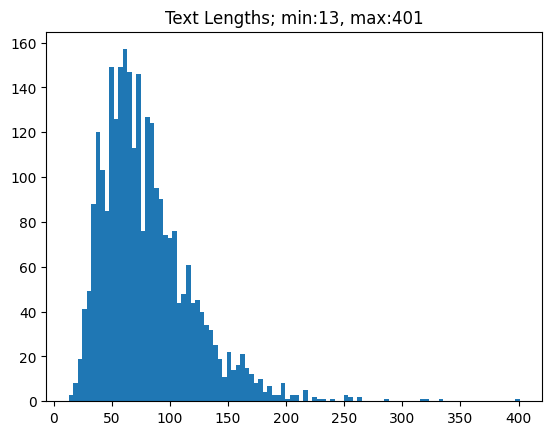

In [11]:
text_lengths = df['text'].apply(len)
plt.hist(text_lengths, bins=100)
plt.title(f'Text Lengths; min:{text_lengths.min()}, max:{text_lengths.max()}');

In [12]:
df[df['text'].apply(len) < text_lengths.min()+10]

,Id,text,target
29,29,電線市場では、自動車用は堅調に推移しました,2
122,122,一方、無機薬品関連は堅調に推移しました,2
258,258,その結果、品目全体でも前期を上回りました,2
1024,1024,国内においては堅調に推移しました,2
1157,1157,ＯＥＭ事業は減収となりました,1
1236,1236,製粉、化学薬品等の用途は数量を伸ばしました,2
1385,1385,電子材料は、ディスプレイ関連材料が低調でした,1
1519,1519,また、米国の需要は高水準で推移しました,2
1651,1651,中国も現地通貨ベースでは堅調に推移しました,2
1755,1755,住宅着工戸数は、米国・国内ともに増加しました,2


In [13]:
df[df['text'].apply(len) >= text_lengths.max()-100]

,Id,text,target
761,761,"また、前連結会計年度においては、介護付有料老人ホーム４施設のセールアンドリースバック取引及びカラオケ機器の売却、土地の売却に伴い固定資産売却益が発生したことなどから特別利益として1,469,963千円を計上しておりましたが、当連結会...",1
2176,2176,"受 注 高 １,４４３億７１百万円（前連結会計年度比 ４．７％減）\n 売 上 高 １,３７２億２７百万円（前連結会計年度比 ６．６％減）\n 営 業 利 益 ...",1
2444,2444,ジェネリック医薬品業界におきましては、平成27年６月末に閣議決定された「経済財政運営と改革の基本方針2015（以下、骨太の方針2015）」において、ジェネリック医薬品の数量シェア目標として、「平成29年央に70％以上とするとともに平...,2
2518,2518,"この結果、当連結会計年度における売上高は、リオ五輪等の影響でレンタル売上が軟調であった一方、台風や残暑の影響下でも堅調であったリユース商材と年末商戦や新型ゲーム機の発売等で新品商材の売上が寄与したことにより、268,079百万円（前...",1


In [14]:
df.to_csv('D:\\full-stack\\nlp_miniproject\\chABSA_fsa.csv', index=False)
df.to_pickle('D:\\full-stack\\nlp_miniproject\\chABSA_fsa.pickle')

In [23]:
class CFG:
    model_name_or_path = 'D:\\full-stack\\nlp_miniproject\\bert-base-japanese'
    train_path = 'D:\\full-stack\\nlp_miniproject\\train.csv'
    val_path = 'D:\\full-stack\\nlp_miniproject\\val.csv'
    total_max_len = 512
    batch_size = 8
    accumulation_steps = 4
    epochs = 15
    debug = False
    
args = CFG

In [19]:
!pip install fugashi[unidic-lite]
!pip install ipadic


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install tqdm

     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     --------------- ------------------------ 30.7/77.1 kB 1.4 MB/s eta 0:00:01
     ----------------------------------- -- 71.7/77.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 77.1/77.1 kB 613.3 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python39\\Scripts\\tqdm.exe' -> 'C:\\Python39\\Scripts\\tqdm.exe.deleteme'


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import sparse
from tqdm import tqdm
import os

# data_dir = Path('../input/chabsa-for-sentiment-analysis')

# if not os.path.exists("./data"):
#     os.mkdir("./data")

df = pd.read_csv('D:\\full-stack\\nlp_miniproject\\chABSA_fsa.csv')

# negative: 1 -> 0, positive: 2 -> 1
binary_dict = {1:0, 2:1}
df['target'] = df['target'].apply(lambda x: binary_dict[x]).astype('float')


from sklearn.model_selection import ShuffleSplit

NVALID = 0.1  # size of validation set
splitter = ShuffleSplit(n_splits=1, test_size=NVALID, random_state=0)
train_ind, val_ind = next(splitter.split(df))
train_df = df.loc[train_ind].reset_index(drop=True)
val_df = df.loc[val_ind].reset_index(drop=True)

# Base markdown dataframes
val_df.to_csv("D:\\full-stack\\nlp_miniproject\\val.csv", index=False)
train_df.to_csv("D:\\full-stack\\nlp_miniproject\\train.csv", index=False)

In [25]:
with open('D:\\full-stack\\nlp_miniproject\\neg.txt','r') as f:
  neg = f.readlines()
  
with open('D:\\full-stack\\nlp_miniproject\\pos.txt','r') as f:
  pos = f.readlines()

# here 0 is for negative sentences...
df1 = pd.DataFrame({'text': neg})
df1['target'] = 0

# here 1 is for positive sentences...
df2 = pd.DataFrame({'text': pos})
df2['target'] = 1


test_df = pd.concat([df1, df2], axis=0, ignore_index=True)
test_df = (test_df
        .sample(frac=1, ignore_index=True, random_state=42)
        .reset_index()
        .rename(columns={'index': 'Id'}))
test_df

,Id,text,target
0,0,30811.930516.367(51.0)\n,0
1,1,2462.7\n,1
2,2,"2,626112.94517.1\n",1
3,3,"5,790,47827.4\n",1
4,4,19.5\n,0
...,...,...,...
2825,2825,\n,1
2826,2826,14(93.6)(96.6)5151(50)\n,0
2827,2827,"4,7012525.1\n",0
2828,2828,"503144,007\n",1


1    1677
0    1153
Name: target, dtype: int64

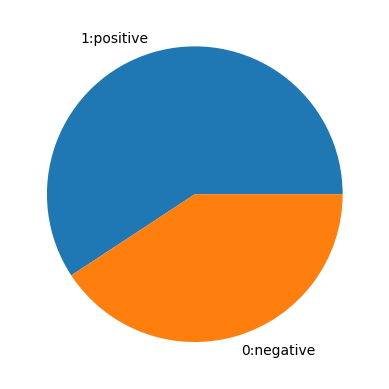

In [26]:
s = test_df['target'].value_counts()
display(s)
plt.pie(s, labels=['1:positive', '0:negative']);

In [27]:
import pandas as pd
import random
mask = test_df['target'] == 1
indices = df[mask].index.to_list()


C:\Users\sonal\AppData\Local\Temp\ipykernel_14400\3850087582.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = df[mask].index.to_list()


In [28]:
rows_to_drop = random.sample(list(indices), s[1]-s[0] )
test_df.drop(rows_to_drop,inplace=True)

In [29]:
import pandas as pd
import random
mask = df['target'] == 1
indices = df[mask].index.to_list()

0    1153
1    1153
Name: target, dtype: int64

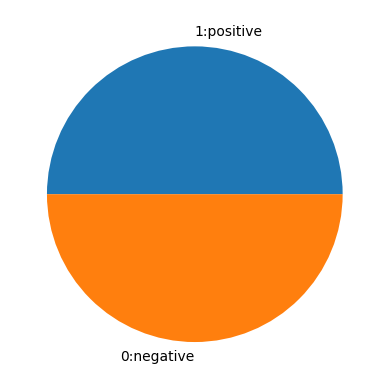

In [30]:
s = test_df['target'].value_counts()
display(s)
plt.pie(s, labels=['1:positive', '0:negative']);

In [31]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

# Get the input sentences and sentiment labels
sentences = test_df["text"]
labels = test_df["target"]

# Tokenize the input sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad the sequences to the same length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
early_stopping = EarlyStopping(patience=5, verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=64, 
          callbacks=[early_stopping]
          )

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy:", accuracy)

Epoch 1/40
29/29 [==============================] - 12s 181ms/step - loss: 0.6953 - accuracy: 0.4832 - val_loss: 0.6929 - val_accuracy: 0.5173
Epoch 2/40
29/29 [==============================] - 4s 143ms/step - loss: 0.6934 - accuracy: 0.4902 - val_loss: 0.6933 - val_accuracy: 0.4827
Epoch 3/40
29/29 [==============================] - 5s 159ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6938 - val_accuracy: 0.4827
Epoch 4/40
29/29 [==============================] - 4s 152ms/step - loss: 0.6921 - accuracy: 0.5065 - val_loss: 0.6894 - val_accuracy: 0.5390
Epoch 5/40
29/29 [==============================] - 4s 148ms/step - loss: 0.6252 - accuracy: 0.6773 - val_loss: 0.7149 - val_accuracy: 0.5238
Epoch 6/40
29/29 [==============================] - 4s 144ms/step - loss: 0.4247 - accuracy: 0.7679 - val_loss: 0.7856 - val_accuracy: 0.4978
Epoch 7/40
29/29 [==============================] - 4s 147ms/step - loss: 0.3649 - accuracy: 0.7787 - val_loss: 0.7837 - val_accuracy: 0.5152
Epoch

In [32]:
X=test_df['text']
y=test_df['target']

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.5151515151515151


In [34]:
#cnn code ....
#CNN
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
# Get the input sentences and sentiment labels
sentences = test_df["text"]
labels = test_df["target"]

# Tokenize the input sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad the sequences to the same length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
early_stopping = EarlyStopping(patience=5, verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, 
          callbacks=[early_stopping]
          )

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy:", accuracy)

Epoch 1/100
29/29 [==============================] - 3s 53ms/step - loss: 0.6944 - accuracy: 0.5049 - val_loss: 0.6923 - val_accuracy: 0.5346
Epoch 2/100
29/29 [==============================] - 1s 38ms/step - loss: 0.6834 - accuracy: 0.5483 - val_loss: 0.6915 - val_accuracy: 0.5022
Epoch 3/100
29/29 [==============================] - 1s 41ms/step - loss: 0.5949 - accuracy: 0.6898 - val_loss: 0.7121 - val_accuracy: 0.5368
Epoch 4/100
29/29 [==============================] - 1s 37ms/step - loss: 0.4037 - accuracy: 0.7636 - val_loss: 0.8392 - val_accuracy: 0.5087
Epoch 5/100
29/29 [==============================] - 1s 33ms/step - loss: 0.3486 - accuracy: 0.7668 - val_loss: 0.9287 - val_accuracy: 0.5152
Epoch 6/100
29/29 [==============================] - 1s 34ms/step - loss: 0.3419 - accuracy: 0.7717 - val_loss: 0.8907 - val_accuracy: 0.4935
Epoch 7/100
29/29 [==============================] - 1s 47ms/step - loss: 0.3319 - accuracy: 0.7722 - val_loss: 0.9323 - val_accuracy: 0.5195
Epoch 

In [37]:
!pip install transformers

  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python39\\Scripts\\transformers-cli.exe' -> 'C:\\Python39\\Scripts\\transformers-cli.exe.deleteme'


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from torch.utils.data import DataLoader, Dataset
import torch
from transformers import AutoTokenizer

class chABSADataset(Dataset):

    def __init__(self, df, model_name_or_path, total_max_len):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.total_max_len = total_max_len  # maxlen allowed by model config
        self.tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

    def __getitem__(self, index):
        row = self.df.iloc[index]

        inputs = self.tokenizer.encode_plus(
            row['text'],
            None,
            add_special_tokens=True,
            max_length=self.total_max_len,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
        
        ids = inputs['input_ids']
        ids = ids[:self.total_max_len]
        if len(ids) != self.total_max_len:
            ids = ids + [self.tokenizer.pad_token_id, ] * (self.total_max_len - len(ids))
        ids = torch.LongTensor(ids)

        mask = inputs['attention_mask']
        mask = mask[:self.total_max_len]
        if len(mask) != self.total_max_len:
            mask = mask + [self.tokenizer.pad_token_id, ] * (self.total_max_len - len(mask))
        mask = torch.LongTensor(mask)

        target = torch.LongTensor([row['target']])
        target = torch.nn.functional.one_hot(target, num_classes=2).squeeze()
        target = target.to(torch.float64)

        assert len(ids) == self.total_max_len

        return ids, mask, target

    def __len__(self):
        return self.df.shape[0]


In [39]:
import torch.nn.functional as F
import torch.nn as nn
import torch
from transformers import AutoModel, AutoTokenizer, AutoConfig, AdamW, get_linear_schedule_with_warmup


class chABSAModel(nn.Module):
    def __init__(self, model_path):
        super(chABSAModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_path)
        self.config = AutoConfig.from_pretrained(model_path, output_hidden_states=True)
        
        self.fc_dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(self.config.hidden_size, 1)
        
        self._init_weights(self.fc)
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(self.config.hidden_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2),
            nn.Sigmoid()
        )
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.bias is not None:
                module.bias.data.zero_()
        elif isinstance(module, nn.Embedding):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.padding_idx is not None:
                module.weight.data[module.padding_idx].zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)

    def forward(self, inputs):
        ids, mask = inputs
        outputs = self.model(ids, mask)
        last_hidden_states = outputs[0]
        prob = self.linear_relu_stack(last_hidden_states)
        prob = torch.mean(prob, dim=1).squeeze()
        return prob


In [40]:
from sklearn.metrics import f1_score

def f1(ground_truth, predictions, debug):
    if debug: print(ground_truth, predictions)
    return f1_score(ground_truth, predictions, average='micro')

In [ ]:
import json
from pathlib import Path
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import sys, os
import torch
import argparse
import pickle
import random


os.makedirs("D:\\full-stack\\nlp_miniproject\\outputs", exist_ok=True)



def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=42)


def get_logger(filename='D:\\full-stack\\nlp_miniproject\\outputs\\train'):
    from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger
LOGGER = get_logger()


if args.debug:
    train_df = pd.read_csv(args.train_path, nrows=500)
    val_df = pd.read_csv(args.val_path, nrows=100)
else:
    train_df = pd.read_csv(args.train_path)
    val_df = pd.read_csv(args.val_path)


train_ds = chABSADataset(train_df, model_name_or_path=args.model_name_or_path, total_max_len=args.total_max_len)
val_ds = chABSADataset(val_df, model_name_or_path=args.model_name_or_path, total_max_len=args.total_max_len)
train_loader = DataLoader(train_ds, batch_size=args.batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=args.batch_size, shuffle=False, drop_last=False)



def read_data(data):
    return (data[0].cuda(), data[1].cuda()), data[2].cuda()


def validate(model, val_loader):
    model.eval()

    tbar = tqdm(val_loader, file=sys.stdout)

    preds = []
    labels = []

    with torch.no_grad():
        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            with torch.cuda.amp.autocast():
                pred = model(inputs)

            preds.append(pred.round().detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())

    return np.concatenate(labels), np.concatenate(preds)


def train(model, train_loader, val_loader, epochs):
    # Creating optimizer and lr schedulers
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]

    num_train_optimization_steps = int(args.epochs * len(train_loader) / args.accumulation_steps)
    optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5,
                      correct_bias=False)  # To reproduce BertAdam specific behavior set correct_bias=False
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0.05 * num_train_optimization_steps,
                                                num_training_steps=num_train_optimization_steps)  # PyTorch scheduler
    
    criterion = torch.nn.BCEWithLogitsLoss()
    scaler = torch.cuda.amp.GradScaler()
    
    list_loss_list = []
    avg_losses = []
    scores = []
    best_score = 0.
    best_scores = []
    for e in range(epochs):
        model.train()
        tbar = tqdm(train_loader, file=sys.stdout)
        loss_list = []
        
        preds = []
        labels = []

        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            with torch.cuda.amp.autocast():
                pred = model(inputs)
                loss = criterion(pred, target)
            scaler.scale(loss).backward()
            if idx % args.accumulation_steps == 0 or idx == len(tbar) - 1:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
                scheduler.step()

            loss_list.append(loss.detach().cpu().item())
            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())

            avg_loss = np.round(np.mean(loss_list), 4)

            tbar.set_description(f"Epoch {e + 1} Loss: {avg_loss} lr: {scheduler.get_last_lr()}")
        
        list_loss_list += loss_list
        avg_losses.append(avg_loss)

        y_val, y_pred = validate(model, val_loader)
        if args.debug: print(y_val.shape, y_pred.shape)
        score = f1(y_val, y_pred, args.debug)

        LOGGER.info(f"Preds score: {score:.4f}")
        scores.append(score)

        if best_score < score:
            best_score = score
            LOGGER.info(f'Epoch {e+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(),'predictions': y_pred},"D:\\full-stack\\nlp_miniproject\\outputs\\mode_best.pth")
            best_scores.append(best_score)
    
    pickle.dump(list_loss_list, open('D:\\full-stack\\nlp_miniproject\\outputs\\list_loss_list.pickle', 'wb'))
    pickle.dump(avg_losses, open('D:\\full-stack\\nlp_miniproject\\outputs\\avg_losses.pickle', 'wb'))
    pickle.dump(scores, open("D:\\full-stack\\nlp_miniproject\\outputs\\scores.pickle", "wb"))
    pickle.dump(best_scores, open("D:\\full-stack\\nlp_miniproject\\outputs\\best_scores.pickle", "wb"))
    torch.save(model.state_dict(), "D:\\full-stack\\nlp_miniproject\\outputs\\model.pth")

    return model, y_pred


model = chABSAModel(args.model_name_or_path)
model = model.cuda()
model, y_pred = train(model, train_loader, val_loader, epochs=args.epochs)



Some weights of the model checkpoint at cl-tohoku/bert-base-japanese were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be 

Epoch 1 Loss: 0.6558 lr: [2.944703530979347e-05, 2.944703530979347e-05]: 100%|██████████| 316/316 [01:30<00:00,  3.49it/s]
100%|██████████| 36/36 [00:03<00:00, 10.40it/s]

Preds score: 0.8546
INFO:__main__:Preds score: 0.8546
Epoch 1 - Save Best Score: 0.8546 Model
INFO:__main__:Epoch 1 - Save Best Score: 0.8546 Model



Epoch 2 Loss: 0.6111 lr: [2.731512325116589e-05, 2.731512325116589e-05]: 100%|██████████| 316/316 [01:30<00:00,  3.51it/s]
100%|██████████| 36/36 [00:03<00:00, 10.76it/s]

Preds score: 0.7730
INFO:__main__:Preds score: 0.7730



Epoch 3 Loss: 0.6017 lr: [2.518321119253831e-05, 2.518321119253831e-05]: 100%|██████████| 316/316 [01:30<00:00,  3.48it/s]
100%|██████████| 36/36 [00:03<00:00, 10.41it/s]

Preds score: 0.8652
INFO:__main__:Preds score: 0.8652
Epoch 3 - Save Best Score: 0.8652 Model
INFO:__main__:Epoch 3 - Save Best Score: 0.8652 Model



Epoch 4 Loss: 0.5742 lr: [2.305129913391073e-05, 2.305129913391073e-05]: 100%|██████████| 316/316 [01:31<00:00,  3.47it/s]
100%|██████████| 36/36 [00:03<00:00, 10.50it/s]

Preds score: 0.8794
INFO:__main__:Preds score: 0.8794
Epoch 4 - Save Best Score: 0.8794 Model
INFO:__main__:Epoch 4 - Save Best Score: 0.8794 Model



Epoch 5 Loss: 0.5651 lr: [2.0919387075283143e-05, 2.0919387075283143e-05]: 100%|██████████| 316/316 [01:31<00:00,  3.47it/s]
100%|██████████| 36/36 [00:03<00:00, 10.27it/s]

Preds score: 0.8794
INFO:__main__:Preds score: 0.8794



Epoch 6 Loss: 0.5704 lr: [1.8787475016655562e-05, 1.8787475016655562e-05]: 100%|██████████| 316/316 [01:30<00:00,  3.48it/s]
100%|██████████| 36/36 [00:03<00:00, 10.51it/s]

Preds score: 0.8706
INFO:__main__:Preds score: 0.8706



Epoch 7 Loss: 0.5648 lr: [1.665556295802798e-05, 1.665556295802798e-05]: 100%|██████████| 316/316 [01:30<00:00,  3.47it/s]
100%|██████████| 36/36 [00:03<00:00, 10.51it/s]

Preds score: 0.8972
INFO:__main__:Preds score: 0.8972
Epoch 7 - Save Best Score: 0.8972 Model
INFO:__main__:Epoch 7 - Save Best Score: 0.8972 Model



Epoch 8 Loss: 0.5583 lr: [1.45236508994004e-05, 1.45236508994004e-05]: 100%|██████████| 316/316 [01:30<00:00,  3.47it/s]
100%|██████████| 36/36 [00:03<00:00, 10.54it/s]

Preds score: 0.8777
INFO:__main__:Preds score: 0.8777



Epoch 9 Loss: 0.5543 lr: [1.2391738840772819e-05, 1.2391738840772819e-05]: 100%|██████████| 316/316 [01:31<00:00,  3.46it/s]
100%|██████████| 36/36 [00:03<00:00, 10.30it/s]

Preds score: 0.8954
INFO:__main__:Preds score: 0.8954



Epoch 10 Loss: 0.5495 lr: [1.0259826782145237e-05, 1.0259826782145237e-05]: 100%|██████████| 316/316 [01:32<00:00,  3.43it/s]
100%|██████████| 36/36 [00:03<00:00, 10.51it/s]

Preds score: 0.8918
INFO:__main__:Preds score: 0.8918



Epoch 11 Loss: 0.5486 lr: [8.127914723517655e-06, 8.127914723517655e-06]: 100%|██████████| 316/316 [01:31<00:00,  3.45it/s]
100%|██████████| 36/36 [00:03<00:00, 10.02it/s]

Preds score: 0.8883
INFO:__main__:Preds score: 0.8883



Epoch 12 Loss: 0.5447 lr: [5.9960026648900734e-06, 5.9960026648900734e-06]: 100%|██████████| 316/316 [01:31<00:00,  3.46it/s]
100%|██████████| 36/36 [00:03<00:00, 10.52it/s]

Preds score: 0.8972
INFO:__main__:Preds score: 0.8972



Epoch 13 Loss: 0.5429 lr: [3.864090606262492e-06, 3.864090606262492e-06]: 100%|██████████| 316/316 [01:31<00:00,  3.47it/s]
100%|██████████| 36/36 [00:03<00:00, 10.38it/s]

Preds score: 0.9007
INFO:__main__:Preds score: 0.9007
Epoch 13 - Save Best Score: 0.9007 Model
INFO:__main__:Epoch 13 - Save Best Score: 0.9007 Model



Epoch 14 Loss: 0.5407 lr: [1.7321785476349102e-06, 1.7321785476349102e-06]: 100%|██████████| 316/316 [01:30<00:00,  3.48it/s]
100%|██████████| 36/36 [00:03<00:00, 10.53it/s]

Preds score: 0.9043
INFO:__main__:Preds score: 0.9043
Epoch 14 - Save Best Score: 0.9043 Model
INFO:__main__:Epoch 14 - Save Best Score: 0.9043 Model



100%|██████████| 36/36 [00:03<00:00, 10.36it/s]

Preds score: 0.9043
INFO:__main__:Preds score: 0.9043


In [ ]:
loss_list = pickle.load(open('./outputs/list_loss_list.pickle', 'rb'))
avg_losses = pickle.load(open('./outputs/avg_losses.pickle', 'rb'))
scores = pickle.load(open('./outputs/scores.pickle', 'rb'))
best_scores = pickle.load(open('./outputs/best_scores.pickle', 'rb'))

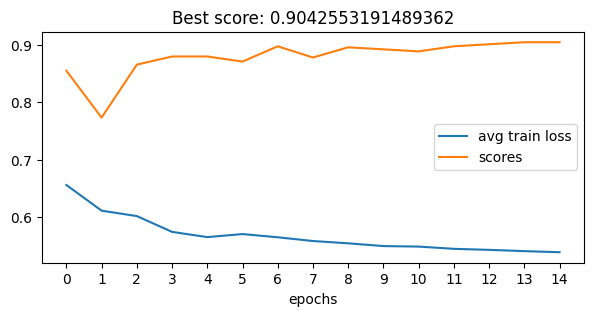

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(avg_losses, label='avg train loss')
plt.plot(scores, label='scores')
plt.xticks(range(0,CFG.epochs))
plt.xlabel('epochs')
plt.legend()
plt.title(f'Best score: {best_scores[-1]}');

In [ ]:
#/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs

# pickle.dump(list_loss_list, open('/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/list_loss_list.pickle', 'wb'))
pickle.dump(avg_losses, open('/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/avg_losses.pickle', 'wb'))
pickle.dump(scores, open("/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/scores.pickle", "wb"))
pickle.dump(best_scores, open("/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/best_scores.pickle", "wb"))
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/model.pth")



In [ ]:

# train_ds = chABSADataset(train_df, model_name_or_path=args.model_name_or_path, total_max_len=args.total_max_len)
# val_ds = chABSADataset(val_df, model_name_or_path=args.model_name_or_path, total_max_len=args.total_max_len)
# train_loader = DataLoader(train_ds, batch_size=args.batch_size, shuffle=True, drop_last=True)
# val_loader = DataLoader(val_ds, batch_size=args.batch_size, shuffle=False, drop_last=False)
train_loader

In [ ]:

        
# tbar = tqdm(train_loader, file=sys.stdout)

# print(tbar)
# print("*"*100)
# print(enumerate(tbar))
# print()
# print()
# for idx, data in enumerate(tbar):
#     print(idx)
#     inputs, target = read_data(data)

#     print(len(inputs),len(target))
#     break
  



In [ ]:
# here trying  to predict new sentence based on the previously trained model
"""
model is saved in /content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/model.pth file
load the model in the new variable
"""

<All keys matched successfully>

In [ ]:
# model.eval()


In [ ]:
train_df1 = pd.read_csv(args.train_path, nrows=500)

In [ ]:
train_df1

,Id,text,target
0,926,ユニフォーム部門については、前期大口受注のあった民需ユニフォームの反動減に加え、秋冬の官公庁関係の受注落ち込みがあり、売上高は前期を下回った,0.0
1,361,海外経済につきましては、ユーロ圏では個人消費、中国では鉱工業部門の回復が寄与し、緩やかに景況感が改善いたしました,1.0
2,1012,この結果、当連結会計年度の当社グループの売上高は、210億円（前連結会計年度比84百万円、0.4％増）となりました,1.0
3,2693,売上高は944億円（対前期＋4.7％）、営業利益は76億円（同＋18.2％）となりました,1.0
4,1654,この結果、売上高は480億58百万円（前年同期比3.5％増）となりました,1.0
...,...,...,...
495,2643,当事業年度におけるわが国経済は、企業の収益環境は良好であり、緩やかな回復基調で推移しましたが、米国トランプ政権の保護主義的な政策運営や欧州政治情勢など、海外動向に不透明感が残るなか、依然として先行き不透明な状況が続いています,1.0
496,1773,回路保護素子事業につきましては、車載用回路保護素子は増加したものの、リチウムイオン電池向けの高電流ヒューズの売上高が減少しました,1.0
497,52,土地の一括売却が減少したこと等により減収となりましたが、分譲マンションにおいて高価格帯物件が増加したこと等により売上が増加、粗利益率も改善したことにより増益となりました,1.0
498,2697,アルコール測定器の販売は好調に推移いたしました,1.0


In [ ]:
val_df1 = pd.read_csv(args.val_path, nrows=100)

In [ ]:
val_ds1 = chABSADataset(val_df1, model_name_or_path=args.model_name_or_path, total_max_len=args.total_max_len)

In [ ]:
!pip install transformers
!pip install fugashi[unidic-lite]
!pip install ipadic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=c369f750de6dfd17b9926cbf6c379e603f838c3686d74d3e7cecf756b074f0ca
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite
Looking in indexes: https://pypi.org/simple, https://us-pyth

In [ ]:
"""
FINAL CODE ZALA COMPLETEEEEEEEEEEE..... :)
done.
      

"""

class CFG:
    model_name_or_path = 'cl-tohoku/bert-base-japanese'
    train_path = './sample_data/train.csv'
    val_path = './sample_data/val.csv'
    total_max_len = 512
    batch_size = 8
    accumulation_steps = 4
    epochs = 15
    debug = False
    
args = CFG

def read_data(data):

    device = torch.device('cpu')
    return (data[0].to(device), data[1].to(device)), data[2].to(device)


from torch.utils.data import DataLoader, Dataset
import torch
from transformers import AutoTokenizer


class chABSADataset(Dataset):

    def __init__(self, df, model_name_or_path, total_max_len):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.total_max_len = total_max_len  # maxlen allowed by model config
        self.tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

    def __getitem__(self, index):
        row = self.df.iloc[index]

        inputs = self.tokenizer.encode_plus(
            row['text'],
            None,
            add_special_tokens=True,
            max_length=self.total_max_len,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
        
        ids = inputs['input_ids']
        ids = ids[:self.total_max_len]
        if len(ids) != self.total_max_len:
            ids = ids + [self.tokenizer.pad_token_id, ] * (self.total_max_len - len(ids))
        ids = torch.LongTensor(ids)

        mask = inputs['attention_mask']
        mask = mask[:self.total_max_len]
        if len(mask) != self.total_max_len:
            mask = mask + [self.tokenizer.pad_token_id, ] * (self.total_max_len - len(mask))
        mask = torch.LongTensor(mask)

        target = torch.LongTensor([row['target']])
        target = torch.nn.functional.one_hot(target, num_classes=2).squeeze()
        target = target.to(torch.float64)

        assert len(ids) == self.total_max_len

        return ids, mask, target

    def __len__(self):
        return self.df.shape[0]




import torch
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer, AutoConfig, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm
import sys
import pandas as pd

class SM_Model(nn.Module):
    def __init__(self, model_path):
        super(SM_Model, self).__init__()
        self.model = AutoModel.from_pretrained(model_path)
        self.config = AutoConfig.from_pretrained(model_path, output_hidden_states=True)
        
        self.fc_dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(self.config.hidden_size, 1)
        
        self._init_weights(self.fc)
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(self.config.hidden_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2),
            nn.Sigmoid()
        )
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.bias is not None:
                module.bias.data.zero_()
        elif isinstance(module, nn.Embedding):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.padding_idx is not None:
                module.weight.data[module.padding_idx].zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)

    def forward(self, inputs):
        ids, mask = inputs
        outputs = self.model(ids, mask)
        last_hidden_states = outputs[0]
        prob = self.linear_relu_stack(last_hidden_states)
        prob = torch.mean(prob, dim=1).squeeze()
        return prob





model1 = SM_Model('cl-tohoku/bert-base-japanese')


# checkpoint = torch.load('/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/model.pth')
model1.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/datasets/chabsa/outputs/model.pth',map_location=torch.device('cpu')))
model1.eval()


data = {'Id': [1],
        'text': ['ユニフォーム部門については、前期大口受注のあった民需ユニフォームの反動減に加え、秋冬の官公庁関係の受注落ち込みがあり、売上高は前期を下回った'],
        'target': [0]}
test_df = pd.DataFrame(data)

test_ds = chABSADataset(test_df, model_name_or_path=args.model_name_or_path, total_max_len=args.total_max_len)
test_loader = DataLoader(test_ds, batch_size=args.batch_size, shuffle=False, drop_last=False)


tbar = tqdm(test_loader, file=sys.stdout)

preds = []


with torch.no_grad():
    for idx, data in enumerate(tbar):
        inputs, target = read_data(data)

        with torch.cuda.amp.autocast():
            pred = model1(inputs)
            
            te_pred =  pred.unsqueeze(dim=0)
            o_target = torch.argmax(te_pred, dim=1)
            preds.append(o_target)


#will predict 0 or 1
preds[0].round().detach().cpu().numpy().ravel()[0]

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


0

In [ ]:
test_df

,Id,text,target
0,1,ユニフォーム部門については、前期大口受注のあった民需ユニフォームの反動減に加え、秋冬の官公庁関係の受注落ち込みがあり、売上高は前期を下回った,0


In [ ]:
preds[0].round().detach().cpu().numpy().ravel()

array([0])